In [2]:
%matplotlib inline
import os, sys, time
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import csv
import matplotlib.gridspec as gridspec
import itertools

import seaborn as sns

In [3]:
w_dir = os.getcwd()
l_dir = './shake_pretty_tuning_0.001'
filenames = os.listdir(l_dir)
print('filenames: \n', filenames)
    

filenames: 
 ['control_1.csv', 'tuning_1.csv', 'tuning_2.csv', 'control_2.csv', 'control_0.csv', 'tuning_0.csv']


In [4]:

def csv_loader(path):
    master = {}
    total = []
    with open('{0}.csv'.format(path), newline='') as csvfile:
        reader = csv.reader(csvfile)
        keys = next(reader)

        for row in reader:
            total.append(np.float_(row))

    print(keys)
    total = np.array(total)
    mins = np.array([np.min(x) for x in total.T])

    print(keys, mins)

    acc_dict = {}
    loss_dict = {}
    for key in keys:
        if 'acc' in key and '50k' not in key:
            print(key)
            acc_dict[key] = total[:, keys.index(key)]  
        elif 'loss' in key and '50k' not in key:
            print(key)
            loss_dict[key] = total[:, keys.index(key)]

    master['loss'] = loss_dict
    master['acc'] = acc_dict
        
    return master

In [5]:
tuning_0 = csv_loader(l_dir + '/tuning_0')
tuning_1 = csv_loader(l_dir + '/tuning_1')
tuning_2 = csv_loader(l_dir + '/tuning_2')
tuning_master = tuning_0.copy()

for outer in tuning_master.keys():
    print(outer)
    
    for inner in tuning_master[outer].keys():
        print(inner)
        temp_0 = np.vstack((
            tuning_master[outer][inner], tuning_1[outer][inner]))
        temp_1 = np.vstack((
            temp_0, tuning_2[outer][inner]))
        tuning_master[outer][inner] = {}
        tuning_master[outer][inner]['mean'] = np.mean(temp_1, axis = 0)
        tuning_master[outer][inner]['min'] = np.min(temp_1, axis = 0)
        tuning_master[outer][inner]['max'] = np.max(temp_1, axis = 0)

['epoch', 'c10h_train_loss', 'c10h_train_acc', 'c10h_val_loss', 'c10h_val_acc', 'c10h_train_c10_loss', 'c10h_train_c10_acc', 'c10h_val_c10_loss', 'c10h_val_c10_acc', 'v4_loss', 'v4_acc', 'v6_loss', 'v6_acc', 'c10_50k_loss', 'c10_50k_acc']
['epoch', 'c10h_train_loss', 'c10h_train_acc', 'c10h_val_loss', 'c10h_val_acc', 'c10h_train_c10_loss', 'c10h_train_c10_acc', 'c10h_val_c10_loss', 'c10h_val_c10_acc', 'v4_loss', 'v4_acc', 'v6_loss', 'v6_acc', 'c10_50k_loss', 'c10_50k_acc'] [  0.00000000e+00   2.13349199e-01   9.57000000e-01   2.67371417e-01
   9.58000000e-01   4.88192018e-02   9.58666667e-01   8.80354133e-02
   9.60000000e-01   2.30623926e-01   8.99059871e-01   2.25419820e-01
   9.00500000e-01   1.33892660e-04   9.97400000e-01]
c10h_train_loss
c10h_train_acc
c10h_val_loss
c10h_val_acc
c10h_train_c10_loss
c10h_train_c10_acc
c10h_val_c10_loss
c10h_val_c10_acc
v4_loss
v4_acc
v6_loss
v6_acc
['epoch', 'c10h_train_loss', 'c10h_train_acc', 'c10h_val_loss', 'c10h_val_acc', 'c10h_train_c10_loss

In [6]:
   
control_0 = csv_loader(l_dir + '/control_0')
control_1 = csv_loader(l_dir + '/control_1')
control_2 = csv_loader(l_dir + '/control_2')
control_master = control_0.copy()

for outer in control_master.keys():
    print(outer)
    
    for inner in control_master[outer].keys():
        print(inner)
        temp_0 = np.vstack((
            control_master[outer][inner], control_1[outer][inner]))
        temp_1 = np.vstack((
            temp_0, control_2[outer][inner]))
        control_master[outer][inner] = {}
        control_master[outer][inner]['mean'] = np.mean(temp_1, axis = 0)
        control_master[outer][inner]['min'] = np.min(temp_1, axis = 0)
        control_master[outer][inner]['max'] = np.max(temp_1, axis = 0)

['epoch', 'c10h_train_loss', 'c10h_train_acc', 'c10h_val_loss', 'c10h_val_acc', 'c10h_train_c10_loss', 'c10h_train_c10_acc', 'c10h_val_c10_loss', 'c10h_val_c10_acc', 'v4_loss', 'v4_acc', 'v6_loss', 'v6_acc', 'c10_50k_loss', 'c10_50k_acc']
['epoch', 'c10h_train_loss', 'c10h_train_acc', 'c10h_val_loss', 'c10h_val_acc', 'c10h_train_c10_loss', 'c10h_train_c10_acc', 'c10h_val_c10_loss', 'c10h_val_c10_acc', 'v4_loss', 'v4_acc', 'v6_loss', 'v6_acc', 'c10_50k_loss', 'c10_50k_acc'] [  0.00000000e+00   4.37828320e-01   9.62555556e-01   4.66276608e-01
   9.60000000e-01   5.48757027e-04   9.64555556e-01   8.08346580e-02
   9.64000000e-01   2.73328268e-01   9.13904008e-01   2.65770949e-01
   9.15500000e-01   1.33892794e-04   9.99840000e-01]
c10h_train_loss
c10h_train_acc
c10h_val_loss
c10h_val_acc
c10h_train_c10_loss
c10h_train_c10_acc
c10h_val_c10_loss
c10h_val_c10_acc
v4_loss
v4_acc
v6_loss
v6_acc
['epoch', 'c10h_train_loss', 'c10h_train_acc', 'c10h_val_loss', 'c10h_val_acc', 'c10h_train_c10_loss

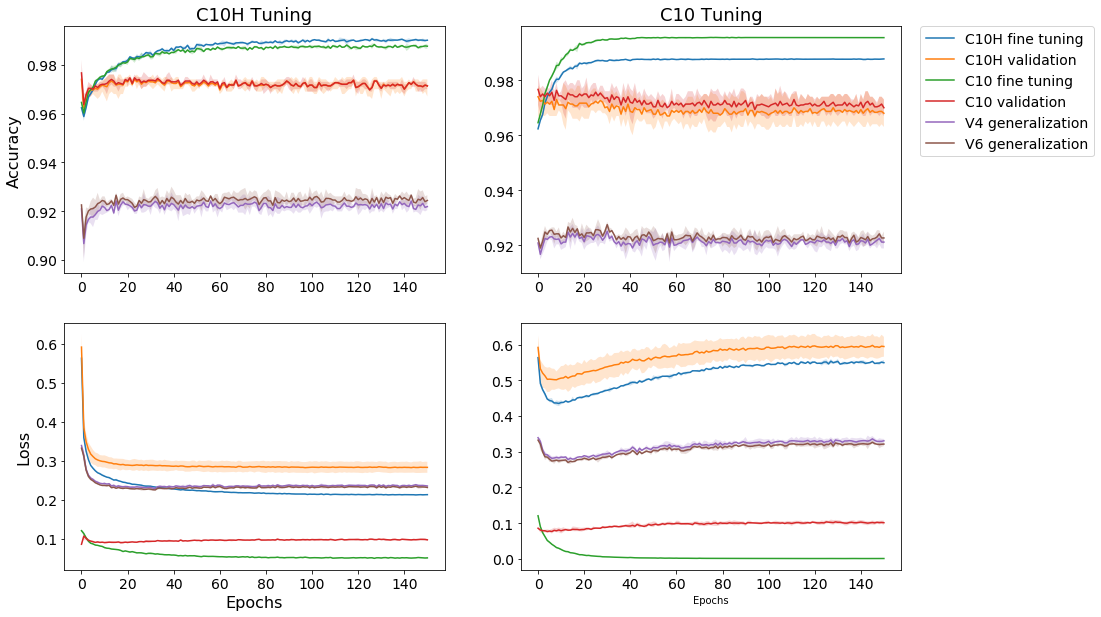

In [7]:
fig = plt.figure(figsize=(15, 10))
#fig.suptitle('Comparision at ' + str(lr) + ': Real vs Control', fontsize=16)
real_dict = tuning_master
control_dict = control_master
labelsize = 16
ticksize=14
titlesize = 18

matplotlib.rcParams['xtick.labelsize'] = ticksize
matplotlib.rcParams['ytick.labelsize'] = ticksize
gs = gridspec.GridSpec(2, 2)

ax_ul = plt.subplot(gs[0, 0])
ax_ul.set_title('C10H Tuning', fontsize = titlesize)
ax_ul.set_ylabel('Accuracy', fontsize = labelsize)
for k, v in real_dict['acc'].items():
    #print(k, v)
    lenn = np.arange(v['mean'].shape[0])
    sns.lineplot(x=lenn, y=v['mean'], ax=ax_ul)
    ax_ul.fill_between(lenn, v['min'], v['max'], alpha=0.2)
    
    #ax_ul.set_ylim([0, 1])
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax_ll = plt.subplot(gs[1, 0])
ax_ll.set_ylabel('Loss', fontsize = labelsize)
for k, v in real_dict['loss'].items():
    sns.lineplot(x=lenn, y=v['mean'], ax=ax_ll)
    ax_ll.fill_between(lenn, v['min'], v['max'], alpha=0.2)
    #ax_ll.plot(v, label=k)
    #ax_ll.set_ylim([0, 1])
    ax_ll.set_xlabel('Epochs', fontsize = labelsize)
    #ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax_ur = plt.subplot(gs[0, 1], sharex=ax_ul)

ax_ur.set_title('C10 Tuning', fontsize = titlesize)
for k, v in control_dict['acc'].items():
    sns.lineplot(x=lenn, y=v['mean'], ax=ax_ur, label = list(itertools.chain(k.split('_')[:-1])))
    ax_ur.fill_between(lenn, v['min'], v['max'], alpha=0.2)
    #ax_ur.plot(v, label = list(itertools.chain(k.split('_')[:-1])))
    #ax_ur.set_ylim([0, 1])
l = ax_ur.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=ticksize)
l.get_texts()[0].set_text('C10H fine tuning')
l.get_texts()[1].set_text('C10H validation')
l.get_texts()[2].set_text('C10 fine tuning')
l.get_texts()[3].set_text('C10 validation')
l.get_texts()[4].set_text('V4 generalization')
l.get_texts()[5].set_text('V6 generalization')
ax_lr = plt.subplot(gs[1, 1], sharex=ax_ll)
#ax_lr.set_ylabel('Loss', fontsize = labelsize)
for k, v in control_dict['loss'].items():
    sns.lineplot(x=lenn, y=v['mean'], ax=ax_lr)
    ax_lr.fill_between(lenn, v['min'], v['max'], alpha=0.2)
    ax_lr.set_xlabel('Epochs')
    #ax_lr.plot(v, label=k)
    #ax_lr.set_ylim([0, 1])
    #ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
 
plt.savefig('training_plot.png', bbox_extra_artists=(l,), bbox_inches='tight')
plt.savefig('training_plot.pdf', bbox_extra_artists=(l,), bbox_inches='tight')
